# Predicting Car Prices

In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 99

In [2]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=col_names)

In [3]:
cars.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


## Data preprocessing

In [5]:
#replacing "?" sign with null value
cars = cars.replace(to_replace="?", value=np.nan)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nul

In [7]:
#numeric to convert: normalized-losses, bore, stroke, horepower, peak-rpm, price
#conversion of text objects to numeric ones

columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

for col in columns:
    cars[col] = cars[col].copy().astype('float64')

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-

In [9]:
#cheking 'num-of-doors' and 'num-of-cylinders' columns to check conversion possibility
cars['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [10]:
cars['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [11]:
doors = {'four': 4, 'two': 2}
cars['num-of-doors'] = cars['num-of-doors'].copy().replace(doors)

cylinders = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 1}
cars['num-of-cylinders'] = cars['num-of-cylinders'].copy().replace(cylinders)

In [12]:
cars['num-of-doors'].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

In [13]:
cars['num-of-cylinders'].value_counts()

4    159
6     24
5     11
8      5
2      4
3      1
1      1
Name: num-of-cylinders, dtype: int64

In [14]:
#removing non numeric columns
text_cols = ['symboling', 'make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

cars = cars.copy().drop(text_cols, axis=1)

In [15]:
cars.head()

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [16]:
#checking number of missing values
#normalized losses column has much more nulls than any other column
cars.isnull().sum()

normalized-losses    41
num-of-doors          2
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [17]:
#replacing missing values in normalized losses column with mean value
avg_norm_losses = np.mean(cars['normalized-losses'])
cars['normalized-losses'] = cars['normalized-losses'].copy().replace(np.nan, avg_norm_losses)

In [18]:
cars.isnull().sum().head()

normalized-losses    0
num-of-doors         2
wheel-base           0
length               0
width                0
dtype: int64

In [19]:
#in remaining columns there is not much of null values
#hence entire rows can be removed where nulls occurs
cars = cars.copy().dropna(axis=0)

In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 17 columns):
normalized-losses    193 non-null float64
num-of-doors         193 non-null float64
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null int64
num-of-cylinders     193 non-null int64
engine-size          193 non-null int64
bore                 193 non-null float64
stroke               193 non-null float64
compression-rate     193 non-null float64
horsepower           193 non-null float64
peak-rpm             193 non-null float64
city-mpg             193 non-null int64
highway-mpg          193 non-null int64
price                193 non-null float64
dtypes: float64(12), int64(5)
memory usage: 27.1 KB


In [21]:
#normalizing entire dataframe without target column (Price)
#many classifiers calculate the distance between two points by the Euclidean distance
#if one of the features has a broad range of values, the distance will be governed by this particular feature
#using MinMaxScaler as alternative to zero mean, unit variance scaling
price_col = cars['price']
norm_cars = (cars - cars.min())/(cars.max() - cars.min())
norm_cars['price'] = price_col

In [22]:
norm_cars.head()

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.428571,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.428571,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.714286,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.428571,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.571429,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate K-nearest neighbors model

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#function perform training of each numeric feature

def knn_train_test(df, train_col, target_col):
    np.random.seed(1)
    knn = KNeighborsRegressor()
    
    #randomizing dataset order
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #spliting dataset to train and test
    last_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    #training knn model
    knn.fit(train_df[[train_col]], train_df[target_col])
    prediction = knn.predict(test_df[[train_col]])
    
    #calculating error metric
    rmse = mean_squared_error(test_df[target_col], prediction)**(0.5)
    
    return rmse


features = norm_cars.columns.drop('price')
univar_rmses = {}

for feature in features:
    rmse = knn_train_test(norm_cars, feature, 'price')
    univar_rmses[feature] = rmse
    
rmse_univar_results = pd.Series(univar_rmses)
rmse_univar_results.sort_values()

engine-size          3247.858492
curb-weight          4277.090667
city-mpg             4453.397655
highway-mpg          4457.947353
width                4586.631863
horsepower           4928.543248
length               5823.219231
wheel-base           5879.632781
num-of-cylinders     5900.820978
compression-rate     6654.971495
bore                 7204.001553
normalized-losses    7701.508191
stroke               8008.490178
peak-rpm             8243.362449
height               8471.473079
num-of-doors         9724.044937
dtype: float64

## Univariate model for different k parameter

In [24]:
def knn_train_test_k(df, train_col, target_col, k_list):
    
    np.random.seed(1)
    
    #randomizing dataset order
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #spliting dataset to train and test
    last_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    k_rmses = {}
    #training knn model for different k parameters
    for k in k_list:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        prediction = knn.predict(test_df[[train_col]])

        #calculating error metric
        rmse = mean_squared_error(test_df[target_col], prediction)**(0.5)
        k_rmses[k] = rmse
        
    return k_rmses

#running function for selected k values
k_values = [1,3,5,7,9]
univar_rmses_k = {}

for feature in features:
    k_rmses = knn_train_test_k(norm_cars, feature, 'price', k_values)
    univar_rmses_k[feature] = k_rmses
    
uni_rmses_k_df = pd.DataFrame(univar_rmses_k)
uni_rmses_k_df

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,7844.319554,20364.033248,6332.159353,6258.164658,4996.571385,10889.539461,5007.487233,6886.336993,3489.244529,7289.379537,8036.066775,7838.400373,4489.554932,7514.818290,5634.707013,4739.653891
3,7746.575683,13006.984283,5691.155680,5764.587398,4360.629650,8567.789618,4142.948725,5735.025293,3117.548910,7252.013521,7567.623207,7012.187434,4481.678972,7422.196486,4295.143746,4256.584038
5,7701.508191,9724.044937,5879.632781,5823.219231,4586.631863,8471.473079,4277.090667,5900.820978,3247.858492,7204.001553,8008.490178,6654.971495,4928.543248,8243.362449,4453.397655,4457.947353
7,7849.466195,9051.907498,5933.800412,5855.722065,4425.324584,8137.528221,4352.419973,6345.576521,3621.839678,7200.340644,8533.035716,6533.591538,5195.750741,7920.649600,4308.397540,4562.009482
9,8038.003527,8945.791131,6007.526484,5901.629001,4715.982229,8215.912288,4774.595282,6028.037299,3934.741570,7165.445394,8339.678716,6776.214585,5159.660348,7923.688119,4701.149969,4827.296451


In [25]:
#removing "num-of-doors" column due to high RMSE value
norm_cars = norm_cars.copy().drop('num-of-doors', axis=1)
univar_rmses_k = univar_rmses_k.pop('num-of-doors', None)
uni_rmses_k_df = uni_rmses_k_df.copy().drop('num-of-doors', axis=1)

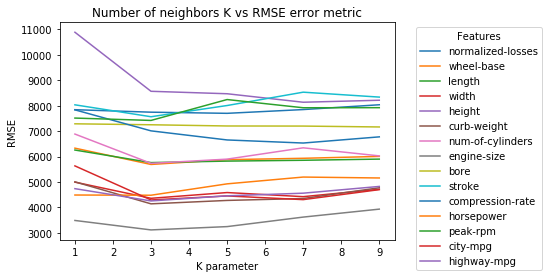

In [52]:
#visualizing results of RMSEs for univariative models with different k values
import matplotlib.pyplot as plt
%matplotlib inline


cols = uni_rmses_k_df.columns
for c in cols:
    plt.plot(uni_rmses_k_df[c])

plt.xlabel('K parameter')
plt.ylabel('RMSE')
plt.title('Number of neighbors K vs RMSE error metric')
plt.legend(bbox_to_anchor=(1.05, 1), title='Features')

## Multivariate model

In [27]:
#function performs training for particular subsets of features
#features picked up basing on performance during univariate testing

def knn_multivar_train_test(df, train_col, target_col):
    np.random.seed(1)
    knn = KNeighborsRegressor(n_neighbors=5)
    
    #randomizing dataset order
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #spliting dataset to train and test
    last_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    #training knn model
    knn.fit(train_df[train_col], train_df[target_col])
    prediction = knn.predict(test_df[train_col])
    
    #calculating error metric
    rmse = mean_squared_error(test_df[target_col], prediction)**(0.5)
    
    return rmse

#features with best performance: engine-size, highway-mpg, width, city-mpg, curb-weight, horsepower
best_features = ['engine-size', 'highway-mpg', 'width', 'city-mpg', 'curb-weight', 'horsepower']

results_multivar = {}
for i in range(2,7):
    train_features = best_features[0:i]
    rmse = knn_multivar_train_test(norm_cars, train_features, 'price')
    results_multivar[i] = rmse

results_multivar

{2: 3463.864183428258,
 3: 3807.0227336916914,
 4: 3707.490251942333,
 5: 3638.8989152577346,
 6: 3577.7543214623147}

## K parameter testing for multivariate models

In [48]:
#picking top 3 models from previous step
#performing tests for k in range 1-25
#Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

def knn_multivar_k_train_test(df, train_col, target_col, k_list):
    
    np.random.seed(1)
    
    #randomizing dataset order
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #spliting dataset to train and test
    last_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    k_rmses = {}
    #training knn model for different k parameters
    for k in k_list:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])
        prediction = knn.predict(test_df[train_col])

        #calculating error metric
        rmse = mean_squared_error(test_df[target_col], prediction)**(0.5)
        k_rmses[k] = rmse
        
    return k_rmses



k_vals = [k for k in range(1, 25)]

top_three = {'two features':['engine-size', 'highway-mpg'], 
             'six features':['engine-size', 'highway-mpg', 'width', 'city-mpg', 'curb-weight', 'horsepower'],
             'five features':['engine-size', 'highway-mpg', 'width', 'city-mpg', 'curb-weight']
            }

results_multivar_k = {}

for key,val in top_three.items():
    k_rmses = knn_multivar_k_train_test(norm_cars, val, 'price', k_vals)
    results_multivar_k[key] = k_rmses
    
results_multivar_k

{'two features': {1: 3323.956973061307,
  2: 2829.029627176658,
  3: 2868.045644114462,
  4: 3293.031461854394,
  5: 3463.864183428258,
  6: 3408.7064079250877,
  7: 3616.9763918250233,
  8: 3746.2540995225395,
  9: 3950.452210224374,
  10: 4154.117566758747,
  11: 4298.300557363897,
  12: 4464.003845986755,
  13: 4610.952151996613,
  14: 4689.026253024919,
  15: 4695.852504015973,
  16: 4751.556752506041,
  17: 4877.025941156537,
  18: 4915.691708377223,
  19: 4930.819256327186,
  20: 4955.3688450523505,
  21: 5008.889994189116,
  22: 5017.159226222069,
  23: 5069.84726457576,
  24: 5100.983669799006},
 'six features': {1: 2691.563053339656,
  2: 3026.607345820266,
  3: 3243.0837341223873,
  4: 3388.084052914479,
  5: 3577.7543214623147,
  6: 3817.39796641159,
  7: 3900.2876171275,
  8: 4200.698376752186,
  9: 4388.490988763385,
  10: 4534.286812116773,
  11: 4725.66032521694,
  12: 4868.39078491996,
  13: 5010.92455357859,
  14: 5049.525967142521,
  15: 5069.697345632338,
  16: 5146.

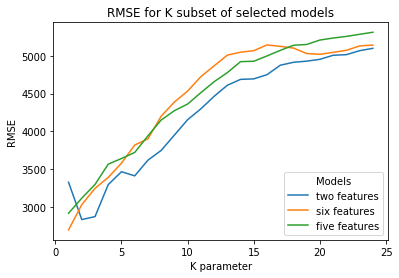

In [51]:
#visualizing results

results_multivar_k_df = pd.DataFrame(results_multivar_k)
models = list(results_multivar_k.keys())

for model in models:
    plt.plot(results_multivar_k_df[model])
plt.xlabel('K parameter')
plt.ylabel('RMSE')
plt.title('RMSE for K subset of selected models')
plt.legend(loc='lower right', title='Models')